In [3]:
# Alle nötige Packages importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Ein random seed einsetzen
np.random.seed(698208)

# Exponentielle Funktion definieren
def exp_function(x, a, b):
    return a*np.exp(b*x)

# Randomisierte Werte erzeugen mit einer Abweichung von +-20%

x = np.linspace(10, 500, 50)
x_mod = [a*(0.8 + 0.4*np.random.random()) for a in x]

# Konstanten definieren
lambda_const = -0.004529
N_0 = 500

# Anzahl der Zerfälle in Abhängigkeit von der Zeit definieren
N = [round(exp_function(m, N_0, lambda_const)) for m in x_mod]

# DataFrame erstellen
zerfall_zeit = pd.DataFrame({"Zeit" : x,
                             "Anzahl" : N})

# Das DataFrame als CSV Datei speichern
zerfall_zeit.to_csv("zerfall-zeit-anzahl-beispiel.csv")

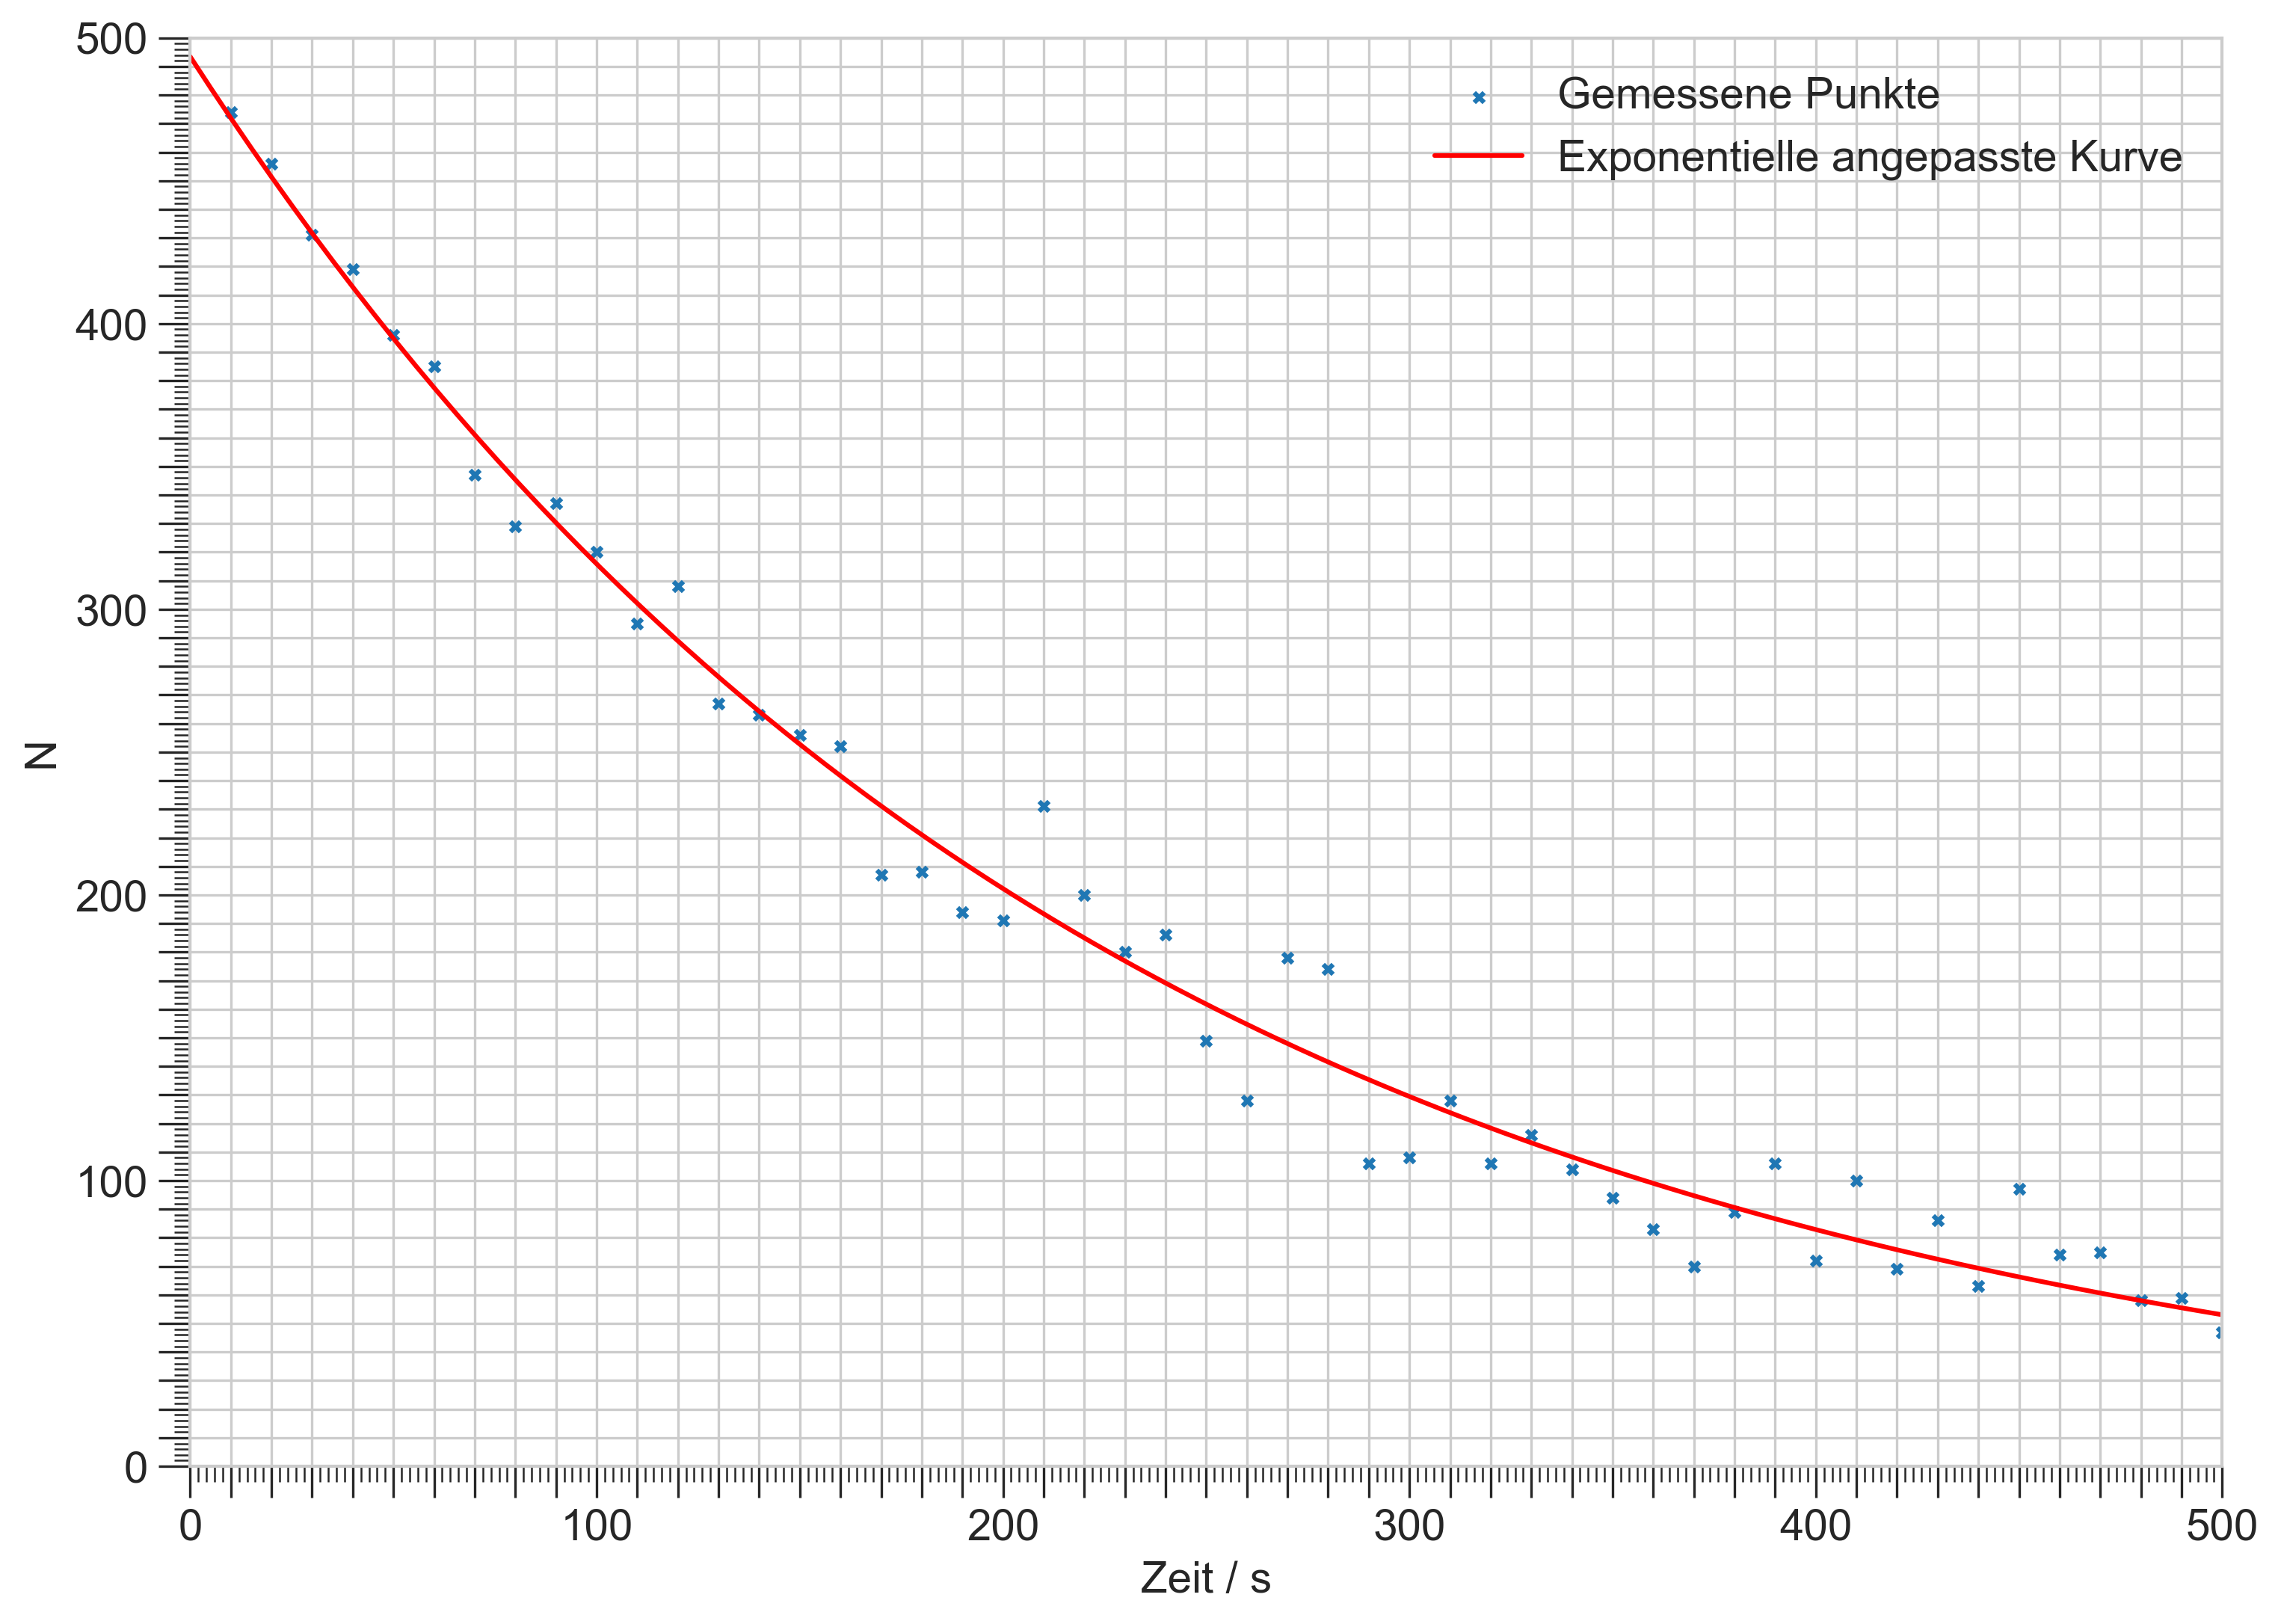

Die gemessene Halbwertzeit aus der Fit Kurve ist: 155.40 s


In [6]:
# Anzahl der Zerfälle aus dem CSV Datei lesen
df = pd.read_csv("zerfall-zeit-beispiel.csv")

# Zeit und Anzahl als Listen definieren
t = df["Zeit"]
N = df["Anzahl"]

# geschätzte Anfangswerte
initial_a = max(N)
initial_b = 0.004529 

# Führe die Anpassung der Daten an die Funktion durch
# curve_fit gibt die optimalen Parameter (a und b) sowie die Kovarianzmatrix zurück
optimal_params, covariance = curve_fit(exp_function, t, N, p0=[initial_a, initial_b])

# Extrahiere die optimalen Parameter
a_optimal, b_optimal = optimal_params

# Linear Space für den Graphen erstellen
t_lin = np.linspace(0, max(t), 100)
N_lin = exp_function(t_lin, a_optimal, b_optimal)

# max(N) runden
max_N_rounded = int(np.ceil(max(N) / 100.0)) * 100

# Plotten
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(11.69, 8.27), dpi=300)

ax.scatter(t, N, label="Gemessene Punkte", marker="x", s=10)
ax.plot(t_lin, N_lin, label="Exponentielle angepasste Kurve", c ="r")

ax.set_xlabel('Zeit / s', fontsize=14)
ax.set_ylabel('N', fontsize=14)


ax.set_xticks(np.arange(0, 501, 10))  
ax.set_xticks(np.arange(0, 501, 2), minor=True) 
ax.set_xticklabels(['' if x % 100 != 0 else str(x) for x in np.arange(0, 501, 10)])

# Milimeterpapier Aussehen gestalten
ax.set_yticks(np.arange(0, max_N_rounded + 1, 10)) 
ax.set_yticks(np.arange(0, max_N_rounded + 1, 2), minor=True)
ax.set_yticklabels(['' if y % 100 != 0 else str(y) for y in np.arange(0, max_N_rounded + 1, 10)])

ax.tick_params(axis='x', which='major', direction='out', length=10, labelsize=14) 
ax.tick_params(axis='x', which='minor', direction='out', length=5) 
ax.tick_params(axis='y', which='major', direction='out', length=10, labelsize=14)
ax.tick_params(axis='y', which='minor', direction='out', length=5) 

ax.set_xlim([0, 500])
ax.set_ylim([0, max_N_rounded])
ax.legend(fontsize=14)
plt.savefig("figures/beispielkurve.jpg")
plt.show()
print(f"Die gemessene Halbwertzeit aus der Fit Kurve ist: {-np.log(2)/b_optimal:.2f} s")